In [2]:
import numpy as np
import matplotlib.pyplot as plt


data = np.load("./data/intersection_left.npy")
print(type(data), data.shape, data.dtype)

<class 'numpy.ndarray'> (46968, 7) float64


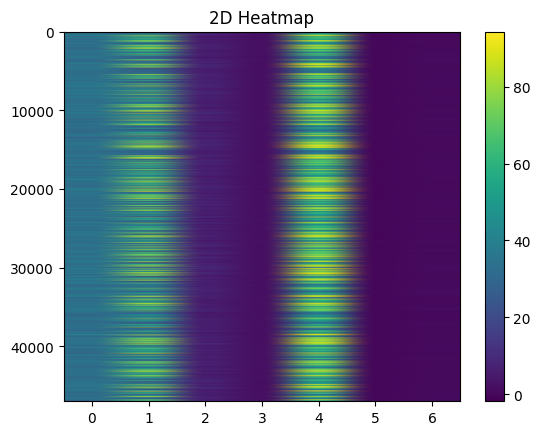

In [3]:
if data.ndim == 1:
    plt.plot(data)
    plt.title("1D Array Plot")
    plt.show()

# 2D array
elif data.ndim == 2:
    plt.imshow(data, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title("2D Heatmap")
    plt.show()

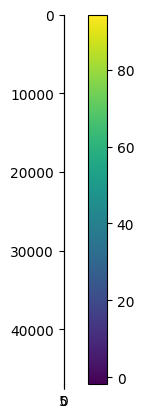

In [6]:
def visualize_npy(file):
    import numpy as np, matplotlib.pyplot as plt
    arr = np.load(file, allow_pickle=True)
    if isinstance(arr, dict):
        print("Keys:", arr.keys())
    elif arr.ndim == 1:
        plt.plot(arr); plt.show()
    elif arr.ndim == 2:
        plt.imshow(arr, cmap='viridis'); plt.colorbar(); plt.show()
    elif arr.ndim == 3:
        plt.imshow(arr[0], cmap='gray'); plt.show()
    else:
        print("Unsupported shape:", arr.shape)

visualize_npy("./data/intersection_left.npy")

In [8]:
import numpy as np
data = np.load("./data/intersection_left.npy")

print("Shape:", data.shape)
print("Sample rows:\n", data[:5])

Shape: (46968, 7)
Sample rows:
 [[ 4.29200071e+01  1.17134379e+01  3.57941880e+00  1.57069179e+00
   6.33059392e+01 -1.93886525e-03  1.80511658e-01]
 [ 4.29204233e+01  1.20719821e+01  3.59146997e+00  1.57051800e+00
   6.33059392e+01 -3.75612696e-03  1.20404147e-02]
 [ 4.29212578e+01  1.24308883e+01  3.58667401e+00  1.57018097e+00
   6.33059392e+01  1.56202484e-03  1.41644788e-01]
 [ 4.29211731e+01  1.27899639e+01  3.59483849e+00  1.57032120e+00
   6.33059392e+01  2.69651056e-03 -3.48891823e-03]
 [ 4.29208160e+01  1.31491302e+01  3.58848960e+00  1.57056332e+00
   6.33059392e+01  3.75823424e-03 -2.25831471e-01]]


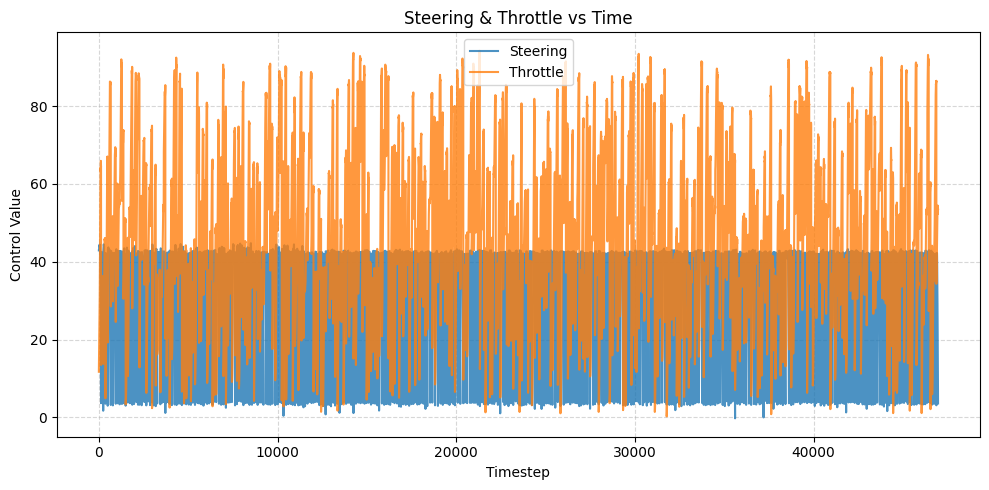

In [9]:
steering = data[:, 0]
throttle = data[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(steering, label='Steering', alpha=0.8)
plt.plot(throttle, label='Throttle', alpha=0.8)
plt.title("Steering & Throttle vs Time")
plt.xlabel("Timestep")
plt.ylabel("Control Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
df = pd.DataFrame(data, columns=[f"Col{i}" for i in range(data.shape[1])])
print(df.corr()) 

          Col0      Col1      Col2      Col3      Col4      Col5      Col6
Col0  1.000000 -0.431943 -0.546209 -0.875719  0.071687  0.126577 -0.099093
Col1 -0.431943  1.000000  0.516510  0.518491  0.574503  0.175890 -0.249930
Col2 -0.546209  0.516510  1.000000  0.501256  0.146926  0.020281 -0.073129
Col3 -0.875719  0.518491  0.501256  1.000000 -0.098192  0.050256  0.000901
Col4  0.071687  0.574503  0.146926 -0.098192  1.000000 -0.053703 -0.052725
Col5  0.126577  0.175890  0.020281  0.050256 -0.053703  1.000000 -0.258331
Col6 -0.099093 -0.249930 -0.073129  0.000901 -0.052725 -0.258331  1.000000


Steering:  min=-0.5995  max=0.6000  mean=0.0815  std=0.2235
Throttle:  min=-1.7989  max=1.8000  mean=0.7427  std=0.8013


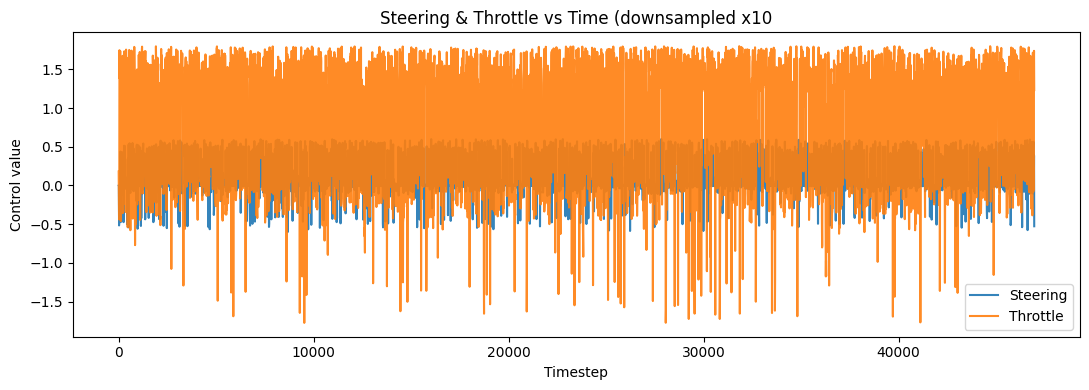

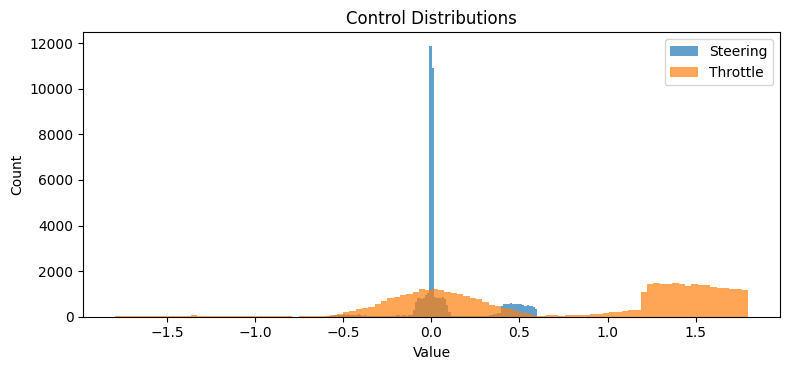

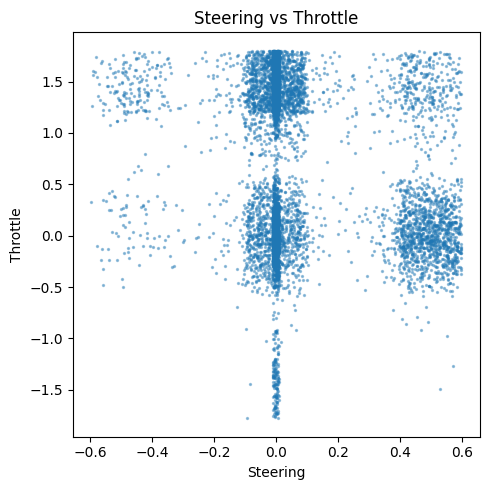

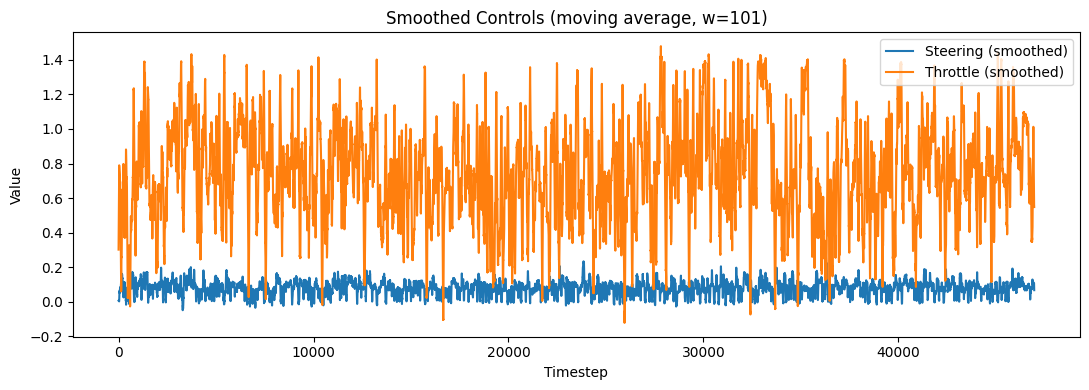

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("./data/intersection_left.npy")  # shape (46968, 7)

steer   = data[:, 5]  # steering
throt   = data[:, 6]  # throttle
t       = np.arange(len(steer))

def zclip(x, lo, hi):
    return np.clip(x, lo, hi)

# ---------- Quick sanity stats ----------
print("Steering:  min={:.4f}  max={:.4f}  mean={:.4f}  std={:.4f}".format(steer.min(), steer.max(), steer.mean(), steer.std()))
print("Throttle:  min={:.4f}  max={:.4f}  mean={:.4f}  std={:.4f}".format(throt.min(), throt.max(), throt.mean(), throt.std()))

# ---------- 1) Time series (downsample to keep it readable) ----------
ds = 10  # show every 10th point
plt.figure(figsize=(11, 4))
plt.plot(t[::ds], steer[::ds], label="Steering", alpha=0.9)
plt.plot(t[::ds], throt[::ds], label="Throttle", alpha=0.9)
plt.title("Steering & Throttle vs Time (downsampled x{}".format(ds))
plt.xlabel("Timestep")
plt.ylabel("Control value")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 2) Distributions ----------
plt.figure(figsize=(8, 3.8))
plt.hist(steer, bins=100, alpha=0.7, label="Steering")
plt.hist(throt, bins=100, alpha=0.7, label="Throttle")
plt.title("Control Distributions")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 3) Steering vs Throttle scatter (sampled) ----------
idx = np.linspace(0, len(steer) - 1, 8000).astype(int)  # sample for speed
plt.figure(figsize=(5, 5))
plt.scatter(steer[idx], throt[idx], s=2, alpha=0.4)
plt.title("Steering vs Throttle")
plt.xlabel("Steering")
plt.ylabel("Throttle")
plt.tight_layout()
plt.show()

# ---------- 4) Optional: smooth view to see trends ----------
# simple moving average (window=101 ~ ~1s if your Hz≈100)
w = 101
k = np.ones(w)/w
steer_s = np.convolve(steer, k, mode="same")
throt_s = np.convolve(throt, k, mode="same")

plt.figure(figsize=(11, 4))
plt.plot(t, steer_s, label="Steering (smoothed)")
plt.plot(t, throt_s, label="Throttle (smoothed)")
plt.title("Smoothed Controls (moving average, w={})".format(w))
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()